In [3]:
import numpy as np
import matplotlib.pyplot as plt

import roomacoustics
import roomacoustics.analytic as analytic

In [10]:
L = np.array([8, 5, 3])/10
zetas = np.ones((3, 2)) * 15

c = 343.9

k_max = 1e3*2*np.pi/c
k_min = 150*2*np.pi/c
k = np.linspace(k_min, k_max*1.1, 2**10)
freq = k*c/2/np.pi

In [11]:

r_R = np.array([3.3, 1.6, 1.8])/10
r_S = np.array([5.3, 3.6, 1.2])/10

k_ns, mode_indices = analytic.eigenfrequencies_rectangular_room_impedance(
    L, k, k_max, zetas, only_normal=True)

p_x = analytic.pressure_modal_superposition(
    k, k*c, k_ns, mode_indices, r_R, r_S, L, zetas)


In [15]:
p_x_fenics = np.loadtxt('fenics/p_R_fenics.csv', delimiter=',', dtype=np.complex)

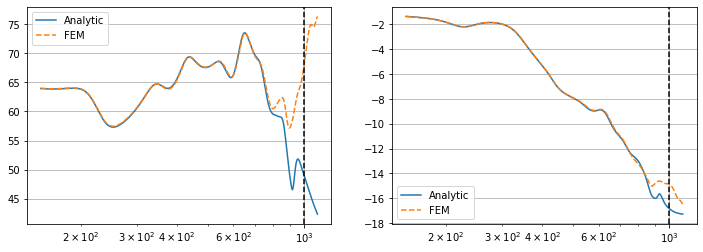

In [58]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.semilogx(freq, 20*np.log10(np.abs(p_x)), label='Analytic')
plt.semilogx(freq, 20*np.log10(np.abs(p_x_fenics*np.sqrt(2))), linestyle='--', label='FEM')
plt.axvline(k_max*c/2/np.pi, color='k', linestyle='--')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.semilogx(freq, np.unwrap(np.angle(p_x)), label='Analytic')
plt.semilogx(freq, np.unwrap(np.angle(p_x_fenics.conj()))-3/4*np.pi, linestyle='--', label='FEM')

plt.axvline(k_max*c/2/np.pi, color='k', linestyle='--')
plt.grid(True)
plt.legend()

# Notes

- FENICS does compute the effective value instead of peak values, needs factor of $\sqrt{2}$
- FENICS phase is rising, probably $\exp{(\omega t)}$ sign convention
- FENICS phase is off by $3/4\pi$, why does this happen?